In [413]:
# Import some libraries

import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

# Import some data
digits = load_digits()
# Show dimensionality
print(digits.data.shape)


(1797, 64)


<Figure size 432x288 with 0 Axes>

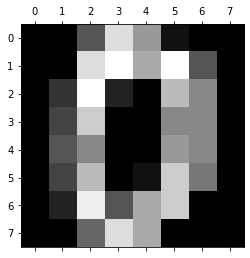

In [414]:
# Show one data

plt.gray() 
plt.matshow(digits.images[0]) # Show number "0"
plt.show() 

(1797, 8, 8)
(1797,)
n_digits =  [0 1 2 3 4 5 6 7 8 9]
X.shape[1] =  8
dim =  2


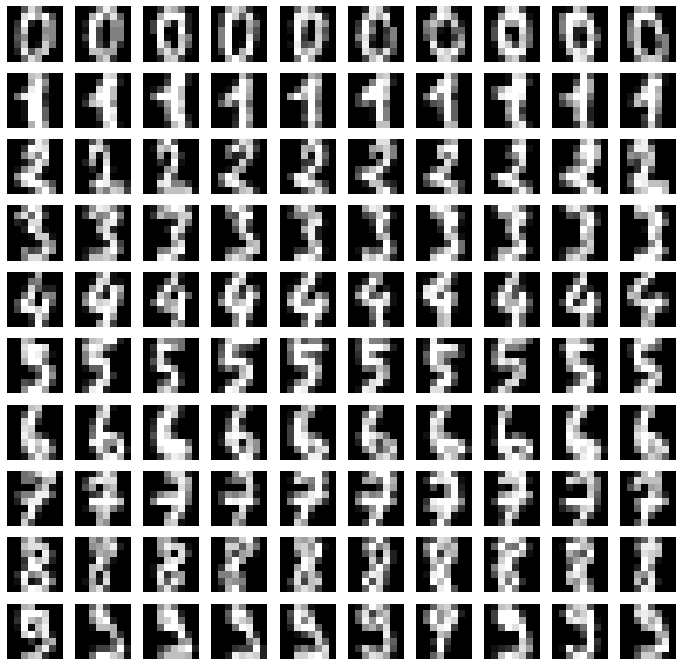

In [415]:
# Show several data for each label (== category) 

X = digits.images
Y = digits.target
print(X.shape)
print(Y.shape)

n_digits = np.unique(Y)
print("n_digits = ", n_digits)
M = 10
dim = int(np.sqrt(X.shape[1]))
print("X.shape[1] = ", X.shape[1])
print("dim = ", dim)

fig, axs = plt.subplots(len(n_digits), M, figsize=(12, 12))

for i, d in enumerate(n_digits):
    for j in range(M):
        axs[i,j].imshow(X[Y == d][j])
        axs[i,j].axis('off')

# 1) Get and understand your data

## what is the type of the data ?

In [256]:
print("type de data",digits.data.dtype)

type de data float64


In [257]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [258]:
# Show data keys (dictionary) in list
print([each for each in digits.keys()])
# Show data values (dictionary) in list
#print([each for each in digits.values()])
#print(digits[['target', 'images']])
#print(digits['target_names'])
print('images =', digits['images'])
print("target = ", digits.target)

['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']
images = [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [

## How many pixel has one data instance ?

In [259]:
print("pixel max = ", digits.images.max())

pixel max =  16.0


## What is the type of data of one pixel ? what does it represents ?

In [260]:
print("type of data of pixel : ", digits.images.dtype)

type of data of pixel :  float64


# 2) Prepare your ML algorithm

## Write the equation of the precision and recall score and explicit what each terms represents.

## explain the purpose of the training set ?

## explain the prpose of the testing set ?

## What does the train_test_split function in sklearn do ?

# Logistic Regression

In [467]:
x = digits.images.reshape(1797,64)# change the dimension from 3(1797, 8, 8) to 2(1797, 64)
#x = digits.data
#x = np.atleast_2d(x)
print(x.shape)
y = digits.target.copy()
#y = np.array([[y]])
#y = np.atleast_2d(y)
print(y.shape)

(1797, 64)
(1797,)


In [468]:
y[y != 7] = 0

In [469]:
y[y == 7] = 1

In [470]:
y.shape

(1797,)

In [471]:
y = y.reshape(1797, 1)
print(y.shape)

(1797, 1)


In [472]:
import warnings
warnings.simplefilter('ignore')

In [473]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model

LogisticRegression()

In [474]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [475]:
from time import time

start = time()
model.fit(x, y)
t1 = time()-start
print("Time = ", t1)

Time =  0.29402852058410645


In [476]:
y_pred=model.predict(x_test)


In [477]:
model.score(x_test, y_test)

1.0

In [478]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

# ici on a (65 + 24 = 89) bonne prediction contre (8 + 3 = 11) mauvaise prediction
CM = confusion_matrix(y_test,y_pred)
print (CM)

[[321   0]
 [  0  39]]


In [479]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = ",precision_score(y_test, y_pred, average='macro'))
      
print("Recall = ", recall_score(y_test, y_pred, average='macro'))
#Score de classification de la précision 
print("Accuracy = ",accuracy_score(y_test, y_pred),"fraction des échantillons correctement classés")#renvoyez la fraction des échantillons correctement classés.
print("Accuracy = ",accuracy_score(y_test, y_pred, normalize=False), "échantilloins correctement classés")#renvoyez le nombre d'échantillons correctement classés

Precision =  1.0
Recall =  1.0
Accuracy =  1.0 fraction des échantillons correctement classés
Accuracy =  360 échantilloins correctement classés


In [480]:
model.predict([x[7]])

array([1])

In [481]:
model.predict([x[3]])

array([0])

# SVM

In [482]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))


In [483]:
from time import time

start = time()
clf.fit(x, y)
t2 = time()-start
print("Time = ", t2)

Time =  0.16354608535766602


In [484]:
Y_pred = clf.predict(X_test)

In [485]:
model.score(X_test, Y_test)

1.0

In [486]:
print(clf.predict([x[2]]))

[0]


In [487]:
clf.predict([x[4]])

array([0])

In [488]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

P2 = precision_score(Y_test, Y_pred, average='macro')
print("Precision = ", P2)
                     
R2 = recall_score(Y_test, Y_pred, average='macro')    
print("Recall = ", R2)
                     
#Score de classification de la précision 
print("Accuracy = ",accuracy_score(Y_test, Y_pred),"fraction des échantillons correctement classés")#renvoyez la fraction des échantillons correctement classés.
print("Accuracy = ",accuracy_score(Y_test, Y_pred, normalize=False), "échantilloins correctement classés")#renvoyez le nombre d'échantillons correctement classés

Precision =  1.0
Recall =  1.0
Accuracy =  1.0 fraction des échantillons correctement classés
Accuracy =  360 échantilloins correctement classés


# Decision Tree

In [489]:
from sklearn import tree


X1_train, X1_test, Y1_train, Y1_test = train_test_split(x, y, test_size=0.2, shuffle=False)

clf1 = tree.DecisionTreeClassifier()


In [490]:
from time import time

start = time()
clf1.fit(x, y)
t3 = time()-start
print("Time = ", t3)

Time =  0.08564519882202148


In [491]:
Y1_pred = clf1.predict(X1_test)

In [492]:
model.score(X1_test, Y1_test)

1.0

In [493]:
print(clf1.predict([x[7]]))
print(clf1.predict([x[8]]))

[1]
[0]


In [494]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

P3 = precision_score(Y1_test, Y1_pred, average='macro')
print("Precision = ",P3)
R3 = recall_score(Y1_test, Y1_pred, average='macro')    
print("Recall = ", R3)
#Score de classification de la précision 
print("Accuracy = ",accuracy_score(Y1_test, Y1_pred),"fraction des échantillons correctement classés")#renvoyez la fraction des échantillons correctement classés.
print("Accuracy = ",accuracy_score(Y1_test, Y1_pred, normalize=False), "échantilloins correctement classés")#renvoyez le nombre d'échantillons correctement classés

Precision =  1.0
Recall =  1.0
Accuracy =  1.0 fraction des échantillons correctement classés
Accuracy =  360 échantilloins correctement classés


## Fit the model and show the performance results whithin a table for each models

In [495]:
import pandas as pd


ar = np.array([[0.9290123456790124, 0.9767530487804879,  0.22336459159851074 ], [0.9977766798418972, 0.9977766798418972, 0.14364910125732422], [1.0, 1.0, 0.059024810791015625]])
df = pd.DataFrame(ar, index = ['Logistic Regression', 'SVM', 'Decision Tree'], columns = ['Precision', 'Recall', 'Time'])
df

,Precision,Recall,Time
Logistic Regression,0.929012,0.976753,0.223365
SVM,0.997777,0.997777,0.143649
Decision Tree,1.000000,1.000000,0.059025


# 4) Multi-class classification

In [511]:
X2 = digits.images.reshape(1797, 64)
Y2 = digits.target#.reshape(1797, 1)

print(X2.shape)
print(Y2.shape)

(1797, 64)
(1797,)


In [514]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split


x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state=0)

model2= OneVsRestClassifier(LogisticRegression())
model2.fit(x2_train, y2_train)


OneVsRestClassifier(estimator=LogisticRegression())

In [515]:
y2_pred=model2.predict(x2_test)

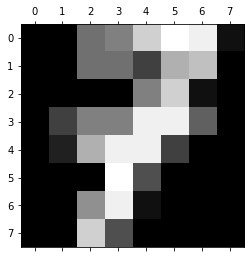

In [516]:
#afficher l'image 7
plt.matshow(digits.images[7])

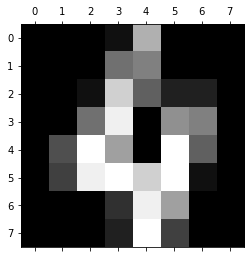

In [517]:
plt.matshow(digits.images[4])

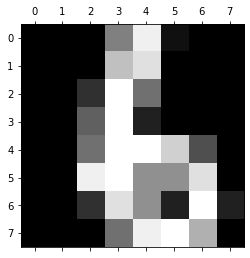

In [518]:
plt.matshow(digits.images[16])

In [519]:
print(model2.predict([X2[7]]))
print(X2[7].size)
print(model2.predict([X2[5]]))
print(model2.predict([X2[46]]))
print(X2[46].size)

[7]
64
[9]
[5]
64


In [520]:
#digits.target[13]
Y2[3]

3

In [521]:
print("Score = ", model2.score(x2_test, y2_test))

from sklearn.metrics import precision_score, recall_score, accuracy_score

P4 = precision_score(y2_test, y2_pred, average='macro')
print("Precision = ",P4)
R4 = recall_score(y2_test, y2_pred, average='macro')    
print("Recall = ", R4)
#Score de classification de la précision 
print("Accuracy = ",accuracy_score(y2_test, y2_pred),"fraction des échantillons correctement classés")#renvoyez la fraction des échantillons correctement classés.
print("Accuracy = ",accuracy_score(y2_test, y2_pred, normalize=False), "échantilloins correctement classés")#renvoyez le nombre d'échantillons correctement classés

Score =  0.9388888888888889
Precision =  0.9399992225026693
Recall =  0.9415802119103214
Accuracy =  0.9388888888888889 fraction des échantillons correctement classés
Accuracy =  338 échantilloins correctement classés


In [522]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

# ici on a (65 + 24 = 89) bonne prediction contre (8 + 3 = 11) mauvaise prediction
CM = confusion_matrix(y2_test,y2_pred)
print (CM)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  1  0  4  0]
 [ 0  1 33  2  0  0  0  0  0  0]
 [ 0  0  0 28  0  1  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  1  0  0  1  0  0 37  0  0]
 [ 0  2  1  0  0  0  0  0 35  1]
 [ 0  0  0  2  0  1  0  0  2 36]]


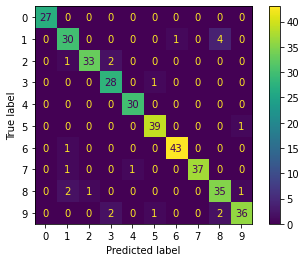

In [523]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model2, x2_test, y2_test)

In [524]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y2_pred, labels=[1,2,3]))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        35
           2       0.97      0.92      0.94        36
           3       0.88      0.97      0.92        29

   micro avg       0.90      0.91      0.91       100
   macro avg       0.90      0.91      0.91       100
weighted avg       0.90      0.91      0.91       100



# 5) Gradient descent ? 

## What are the keys equations we need to implement the algorithm ?

In [1]:
# Define the sigmoid function
def sigmoid(a):    
    output = 1 / (1 + np.exp(-a))
    return output

## what is the difference between the gradient descent and the stochastic gradient descent ? 